### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity,both_castled_early,total_captures_early,activity_diff
0,2504,2371,2,0,133,2437.5,1,133,0,38.0,...,1.0,1.0,0.0,0.0,0.0,34.0,35.0,1,2.0,-1.0
1,2487,2596,1,0,109,2541.5,0,-109,0,38.0,...,1.0,1.0,0.0,1.0,1.0,34.0,40.0,1,1.0,-6.0
2,2915,2921,1,0,6,2918.0,0,-6,0,38.0,...,1.0,1.0,0.0,0.0,0.0,36.0,38.0,1,2.0,-2.0
3,2542,2433,2,0,109,2487.5,1,109,10,35.0,...,1.0,0.0,1.0,0.0,1.0,45.0,33.0,0,5.0,12.0
4,2473,2658,0,0,185,2565.5,0,-185,0,33.0,...,1.0,1.0,1.0,0.0,1.0,34.0,33.0,1,4.0,1.0


### 2. Prepare data

In [3]:
X = df.drop(['ResultNumeric'], axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3243955, 33)
Target: (3243955,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,                # Use all CPU cores
)

In [6]:
start_time = time.time()

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 215.54 seconds (3.59 minutes)


### 5. Evaluate

In [7]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5852 (58.52%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.56      0.58      0.57    265868
        Draw       0.88      0.27      0.42     83919
   White Win       0.59      0.68      0.63    299004

    accuracy                           0.59    648791
   macro avg       0.67      0.51      0.54    648791
weighted avg       0.61      0.59      0.58    648791



### 6. Confusion Matrix

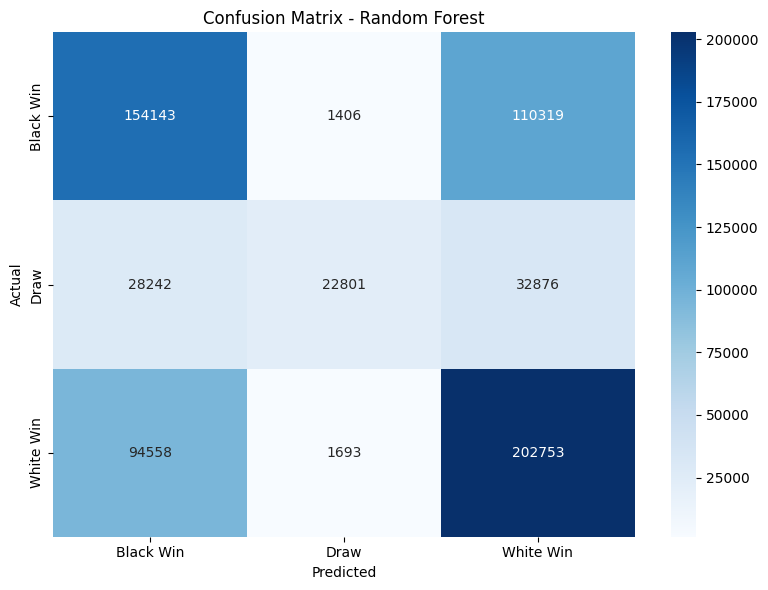

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### 7. Feature Importance

                  Feature  Importance
6    WhiteRatingAdvantage    0.206224
4               AvgRating    0.153009
0                WhiteElo    0.136230
1                BlackElo    0.133393
5      WhiteIsHigherRated    0.096309
3              RatingDiff    0.076567
2             EventTypeID    0.023670
32          activity_diff    0.017629
29       b_piece_activity    0.015415
28       w_piece_activity    0.015370
7                   ECOID    0.012470
19            center_diff    0.008702
22       development_diff    0.008671
20          w_development    0.008335
8        w_material_early    0.008325
9        b_material_early    0.007698
21          b_development    0.006834
18       b_center_control    0.006261
17       w_center_control    0.006122
10    material_diff_early    0.006067
31   total_captures_early    0.005297
16  aggression_diff_early    0.005290
15     b_aggression_early    0.004540
14     w_aggression_early    0.004379
23        w_castled_early    0.003542
24        b_

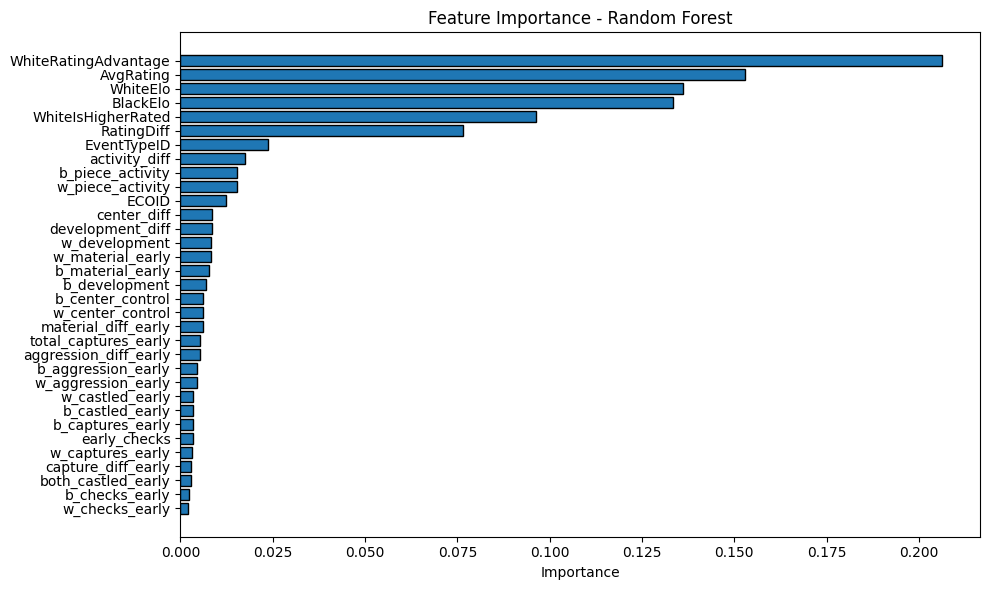

In [9]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], edgecolor="black")
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()